In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from sklearn.metrics import mean_squared_error
%matplotlib inline
#%matplotlib qt

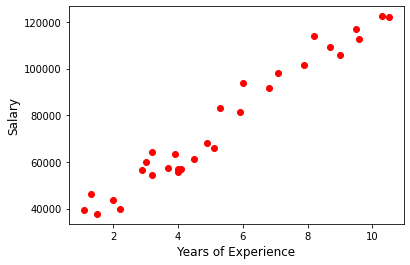

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, 0].values #Feature matrix
y = dataset.iloc[:, 1].values #Criterion Matrix 
plt.scatter(x,y,color='red')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);

# Minimos cuadrados
## Solución analítica univariable
modelo
$\Large{y=mx+b}$

función de error
$ \varepsilon (m,b)=   \sum_{i=1}^{N} (y-mx-b)^2 $

$\Large{m= \frac{N \sum_{i=1}^{N} {x_iy_i}- \sum_{i=1}^{N}{y_i} \sum_{i=1}^{N}{x_i}}{N \sum_{i=1}^{N}{x_i^2} - (\sum_{i=1}^{N}{x_i})^2}}$

$\Large{b=   \frac{\sum_{i=1}^{N}{y_i} \sum_{i=1}^{N}{x_i^2}- \sum_{i=1}^{N} {x_iy_i}\sum_{i=1}^{N}{x_i}} {N \sum_{i=1}^{N}{x_i^2}-(\sum_{i=1}^{N}{x_i})^2  }}$


30
RMS = 5592.043609


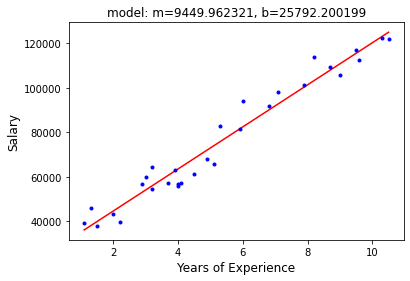

In [3]:
#parameter estimation
N=len(x)
print(len(x))
sumxy=np.sum(x*y)
sumy=np.sum(y)
sumx=np.sum(x)
sumx2=sumx**2
sumxx=np.sum(x**2)
m= (N*sumxy - sumy*sumx)/(N*sumxx- sumx2)
b=(sumy*sumxx-sumxy*sumx)/(N*sumxx- sumx2)


#plot 
x_p=np.array([np.min(x),np.max(x)])
y_p=m*x_p+b
plt.plot(x_p,y_p,'r-')
plt.plot(x,y,'b.')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);
plt.title('model: m=%f,'  %m +' b=%f'  %b)

#RMS
rms = mean_squared_error(y,m*x+b , squared=False)
print("RMS = %f" %rms)

## Función objetivo por gradiente descendente clásico


- Ejemplo de hipótesis: regresión lineal 
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0+\theta_1x_1+\cdots + \theta_n x_n
\end{equation*}


- Convención para simplificar notación: $x_0={1}$
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0x_0+\theta_1x_1+\cdots + \theta_n x_n=\sum_{i=0}^{n}{\theta_{i}x_{i}}
\end{equation*} 
\begin{equation*}
=\boldsymbol{\theta}^T  \mathbf{x}= \langle \boldsymbol{\theta},  \mathbf{x} \rangle= \boldsymbol{\theta} \cdot{}  \mathbf{x}
\end{equation*}
\begin{equation*}
\boldsymbol{\theta} = [\theta_{0},\theta_{1}, \ldots ,\theta_{n}]^T
\end{equation*}  
\begin{equation*}
\boldsymbol{x} = [x_{0},x_{1}, \ldots ,x_{n}]^T
\end{equation*}  


- Para encontrar $\boldsymbol{\theta}$ minimizamos la función de error $J(\boldsymbol{\theta})$ con 
\begin{equation*}
J(\boldsymbol{\theta}) = \frac{1}{2} \sum_{i=1}^{m} ( h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})- y^{(i)} )^2
\end{equation*}

\begin{equation*}
 \boldsymbol{\theta}^{*}= \arg\min_{\boldsymbol{\theta}} \boldsymbol{\theta}
\end{equation*}
Objetivo:
Se buscan parámetros $\boldsymbol{\theta}$ que producen el menor valor de $\boldsymbol{\theta}$

- Para el caso de dos parametros una caraterística
\begin{equation*}
J(\theta_0,\theta_1) = \frac{1}{2}  \sum_{i=1}^{m}  ( \theta_0+\theta_1 x_{1}^{(i)} - y^{(i)} )^2
\end{equation*}  

### Algoritmo de gradiente descendente  

1.- Tome un valor $\boldsymbol{\theta}^{(0)}$ inicial, t=0

2.- Calcule en   $\boldsymbol{\theta}^{(t)}$ el gradiente (máxima dirección de cambio)
\begin{equation*}
\nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})= \left[ \frac{\partial J}{\partial \theta_{0}}  \frac{\partial J}{\partial \theta_{1}}  \cdots \frac{\partial J}{\partial \theta_{0}} \right]^{T} 
\end{equation*}
3.- Calcule la nueva posición 
\begin{equation*}
{\boldsymbol{\theta}}^{(t+1)}:= {\boldsymbol{\theta}}^{(t)}- \alpha \nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})
\end{equation*}
o de forma equivalente para cada $\theta_{j}, j\in 1, \ldots ,n$
\begin{equation*}
\theta_{j}^{(t+1)}:=\theta_{j}^{(t)}- \alpha \frac{\partial J({\boldsymbol{\theta}}^{(t)})}{\partial \theta_j}
\end{equation*}


In [4]:
theta = np.array([[0],[0]])
ep=1e-4
lr =0.001
n_iter = 2
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x),1)),x]
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_b,theta)
    si=-lr*(x_b.T.dot((pred - y)))
    print(si.shape)
    theta = theta + si;
    if LA.norm(si)<ep:
        break;
print("Iterations: %d" %it)
print("analytic: b=%f, m=%f,  \nDG: b=%f m=%f," %(b,m,theta[0],theta[1]))
rms = mean_squared_error(y,m*x+b , squared=False)
print("RMS_analytic = %f" %rms)
rms = mean_squared_error(y,theta[1]*x+theta[0] , squared=False)
print("RMS_gradient = %f" %rms)


(2, 1)
(2, 1)
Iterations: 1
analytic: b=25792.200199, m=9449.962321,  
DG: b=2208.856717 m=12805.596794,
RMS_analytic = 5592.043609
RMS_gradient = 12330.430510


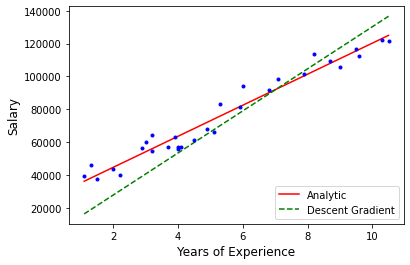

In [5]:
#plot 
y_g=theta[1]*x_p+theta[0]
plt.plot(x_p,y_p,'r-')
plt.plot(x_p,y_g,'g--')
plt.plot(x,y,'b.')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);
plt.legend(["Analytic", "Descent Gradient"], loc ="lower right")

800 600
0
(800, 600) (800, 600)


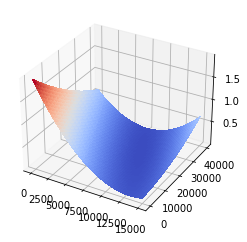

In [6]:

#analytic: b=25792.200199, m=9449.962321,  

B = np.arange(0, 40000, 50)
Blen = len(B)
M = np.arange(0, 15000, 25)
Mlen = len(M)
print(Blen,Mlen)
pred=np.zeros([Blen,Mlen])


for i in range(Blen):
    for j in range(Mlen):
        temp=np.array([[B[i]],[M[j]]])
        temp=np.dot(x_b,temp)
        temp=np.sum((temp - y)**2)
        pred[i,j]=temp
#         temp=(x_b.T.dot((temp - y)))
#         pred[i,j]=LA.norm(temp)

print(np.min(B))
B, M = np.meshgrid(M, B)
print(pred.shape, B.shape)       
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(B, M, pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()
pred_t=pred

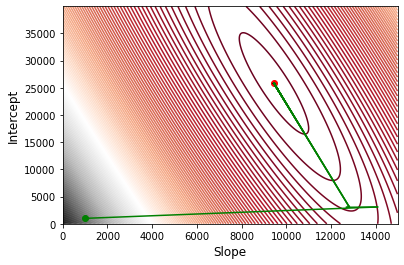

[[25792.18475436]
 [ 9449.96461333]]


In [7]:

fig, ax = plt.subplots()
plt.contour(B, M, pred_t, 150, cmap='RdGy');
plt.xlabel("Slope", fontsize=12);
plt.ylabel("Intercept", rotation=90, fontsize=12);
plt.plot(9449.962321, 25792.200199 , 'ro')

theta_pre = np.array([[1000],[1000]])
theta_new = theta_pre
ep=1e-4
lr =0.001
n_iter = 5000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x),1)),x]
plt.plot(theta_pre[0], theta_pre[1], 'go')
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_b,theta_pre)
    si=-lr*(x_b.T.dot((pred - y)))
    theta_new = theta_pre + si;
    xt=np.array([theta_pre[1],theta_new[1]])
    yt=np.array([theta_pre[0],theta_new[0]])
#    plt.plot(theta_new[1], theta_new[0], 'go')
    plt.plot(xt,yt,'g-')
    theta_pre=theta_new
#     print(theta_pre)
    if LA.norm(si)<ep:
        break;
plt.show()
print(theta_pre)

100 56
23000
[[25792.20019867]
 [ 9449.96232146]]


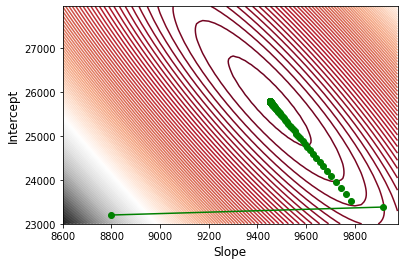

In [9]:
#9449.962321, 25792.200199
%matplotlib inline
B = np.arange(23000, 28000, 50)
Blen = len(B)
M = np.arange(8600, 10000, 25)
Mlen = len(M)
print(Blen,Mlen)
pred=np.zeros([Blen,Mlen])


for i in range(Blen):
    for j in range(Mlen):
        temp=np.array([[B[i]],[M[j]]])
        temp=np.dot(x_b,temp)
        temp=np.sum((temp - y)**2)
        pred[i,j]=temp
#         temp=(x_b.T.dot((temp - y)))
#         pred[i,j]=LA.norm(temp)

print(np.min(B))
B, M = np.meshgrid(M, B)
fig, ax = plt.subplots()
plt.contour(B, M, pred, 150, cmap='RdGy');
plt.xlabel("Slope", fontsize=12);
plt.ylabel("Intercept", rotation=90, fontsize=12);
plt.plot(9449.962321, 25792.200199 , 'ro')



theta_pre = np.array([[23200],[8800]])
theta_new = theta_pre
ep=1e-4
lr =0.001
n_iter = 5000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x),1)),x]
plt.plot(theta_pre[1], theta_pre[0], 'go')
cont=0;
for it in range(n_iter):
     #Gradient
    pred = np.dot(x_b,theta_pre)
    si=-lr*(x_b.T.dot((pred - y)))
    theta_new = theta_pre + si;
    if cont==0:
        xt=np.array([theta_pre[1],theta_new[1]])
        yt=np.array([theta_pre[0],theta_new[0]])
        plt.plot(theta_new[1], theta_new[0], 'go')
        plt.plot(xt,yt,'g-')
    cont=cont+1
    if cont>10:
        cont=0
    theta_pre=theta_new
# #     print(theta_pre)
#     if LA.norm(si)<ep:
#         break;
# plt.show()
print(theta_pre)